In [61]:
import pandas as pd
import matplotlib.pyplot as plt

In [62]:
# Load the uploaded Excel file
file_path = 'Todos.xlsx'
#Columnas a comparar
columnas = ['Abstaylor', 'Simulated-annealing']


data = pd.read_excel(file_path, sheet_name=None)

# Display the sheet names and the first few rows of each sheet to understand the structure of the data
sheet_names = data.keys()
data_preview = {sheet: data[sheet].head() for sheet in sheet_names}
sheet_names, data_preview

(dict_keys(['Tiempos', 'Nodos']),
 {'Tiempos':    Problema  Abstaylor  Hill-climbing  Simulated-annealing  \
  0      chem    1802.18        1822.36              1825.23   
  1    chem-1    1803.55        1817.02              1823.92   
  2   chembis     861.38         876.53               884.47   
  3  dualc5\n      71.20          70.60                73.98   
  4  dualc8\n     291.08         305.19               306.15   
  
     Simulated-annealing-joa  
  0                  1806.31  
  1                  1802.18  
  2                   870.04  
  3                    76.26  
  4                   293.39  ,
  'Nodos':    Problema  Abstaylor  Hill-climbing  Simulated-annealing  \
  0      chem   905104.8       904233.6             913766.4   
  1    chem-1   905104.8       904233.6             913766.4   
  2   chembis   480774.8       480678.4             489835.6   
  3  dualc5\n    54014.8        53427.2              54988.4   
  4  dualc8\n   189155.6       186808.8             

In [63]:
# Obtener la lista de nombres de los problemas y guardarla en una lista
problemas = data['Tiempos']['Problema'].tolist()

# Mostrar la lista de problemas
problemas

['chem',
 'chem-1',
 'chembis',
 'dualc5\n',
 'dualc8\n',
 'ex14_2_7',
 'ex2_1_7',
 'ex2_1_8',
 'ex2_1_9',
 'ex2_1_9bis',
 'ex6_1_3',
 'ex6_1_3bis',
 'ex6_2_10',
 'ex6_2_12',
 'ex6_2_6',
 'ex6_2_8',
 'ex6_2_9',
 'ex8_4_4bis',
 'ex8_5_1bis',
 'himmel16',
 'hs088\n',
 'hs093\n',
 'hs102\n',
 'hs103\n',
 'hs108\n',
 'hs113\n',
 'launch',
 'mistake\n',
 'odfits\n',
 'sambal']

In [64]:
# borrar las demas columnas
for sheet in sheet_names:
    data[sheet] = data[sheet][columnas]

# Mostrar head de cada hoja
data_preview = {sheet: data[sheet].head() for sheet in sheet_names}
data_preview


{'Tiempos':    Abstaylor  Simulated-annealing
 0    1802.18              1825.23
 1    1803.55              1823.92
 2     861.38               884.47
 3      71.20                73.98
 4     291.08               306.15,
 'Nodos':    Abstaylor  Simulated-annealing
 0   905104.8             913766.4
 1   905104.8             913766.4
 2   480774.8             489835.6
 3    54014.8              54988.4
 4   189155.6             188129.2}

In [65]:
# Normalizar filas
for sheet in sheet_names:
    data[sheet] = data[sheet].div(data[sheet].sum(axis=1), axis=0)

# Mostrar head de cada hoja
data_preview = {sheet: data[sheet] for sheet in sheet_names}
data_preview

{'Tiempos':     Abstaylor  Simulated-annealing
 0    0.496823             0.503177
 1    0.497192             0.502808
 2    0.493387             0.506613
 3    0.490426             0.509574
 4    0.487383             0.512617
 5    0.413003             0.586997
 6    0.486642             0.513358
 7    0.385114             0.614886
 8    0.488736             0.511264
 9    0.592571             0.407429
 10   0.493107             0.506893
 11   0.501086             0.498914
 12   0.495491             0.504509
 13   0.488691             0.511309
 14   0.490683             0.509317
 15   0.492841             0.507159
 16   0.488477             0.511523
 17   0.488774             0.511226
 18   0.464048             0.535952
 19   0.647313             0.352687
 20   0.351378             0.648622
 21   0.495474             0.504526
 22   0.426541             0.573459
 23   0.463878             0.536122
 24   0.393850             0.606150
 25   0.398876             0.601124
 26   0.711478   

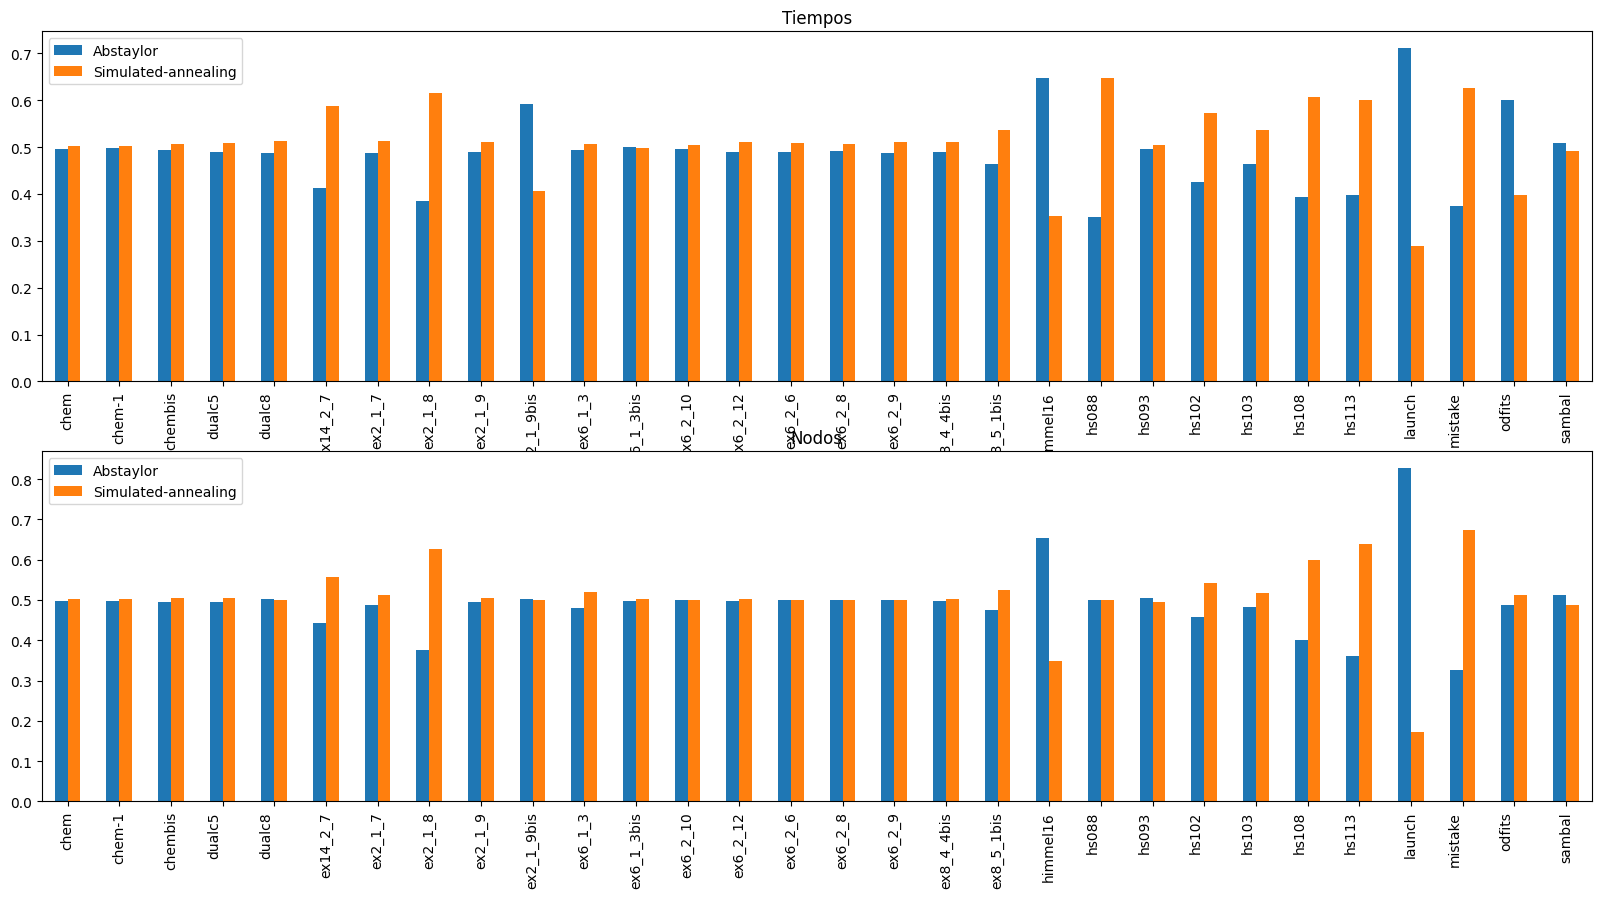

In [66]:
fig, axs = plt.subplots(2, 1, figsize=(20, 10))
data['Tiempos'].plot(kind='bar', ax=axs[0])
data['Nodos'].plot(kind='bar', ax=axs[1])
axs[0].set_title('Tiempos')
axs[1].set_title('Nodos')

# Set the x-tick labels to be the problem names
axs[0].set_xticklabels(problemas)
axs[1].set_xticklabels(problemas)

plt.show()


In [67]:
# Sacar diferencia % entre columnas
for sheet in sheet_names:
    data[sheet]['Diferencia'] = data[sheet].diff(axis=1).iloc[:, -1] * 100

# Mostrar head de cada hoja
data_preview = {sheet: data[sheet] for sheet in sheet_names}
data_preview

{'Tiempos':     Abstaylor  Simulated-annealing  Diferencia
 0    0.496823             0.503177    0.635440
 1    0.497192             0.502808    0.561548
 2    0.493387             0.506613    1.322565
 3    0.490426             0.509574    1.914864
 4    0.487383             0.512617    2.523316
 5    0.413003             0.586997   17.399449
 6    0.486642             0.513358    2.671599
 7    0.385114             0.614886   22.977125
 8    0.488736             0.511264    2.252816
 9    0.592571             0.407429  -18.514166
 10   0.493107             0.506893    1.378683
 11   0.501086             0.498914   -0.217108
 12   0.495491             0.504509    0.901708
 13   0.488691             0.511309    2.261712
 14   0.490683             0.509317    1.863480
 15   0.492841             0.507159    1.431832
 16   0.488477             0.511523    2.304609
 17   0.488774             0.511226    2.245250
 18   0.464048             0.535952    7.190413
 19   0.647313             0.

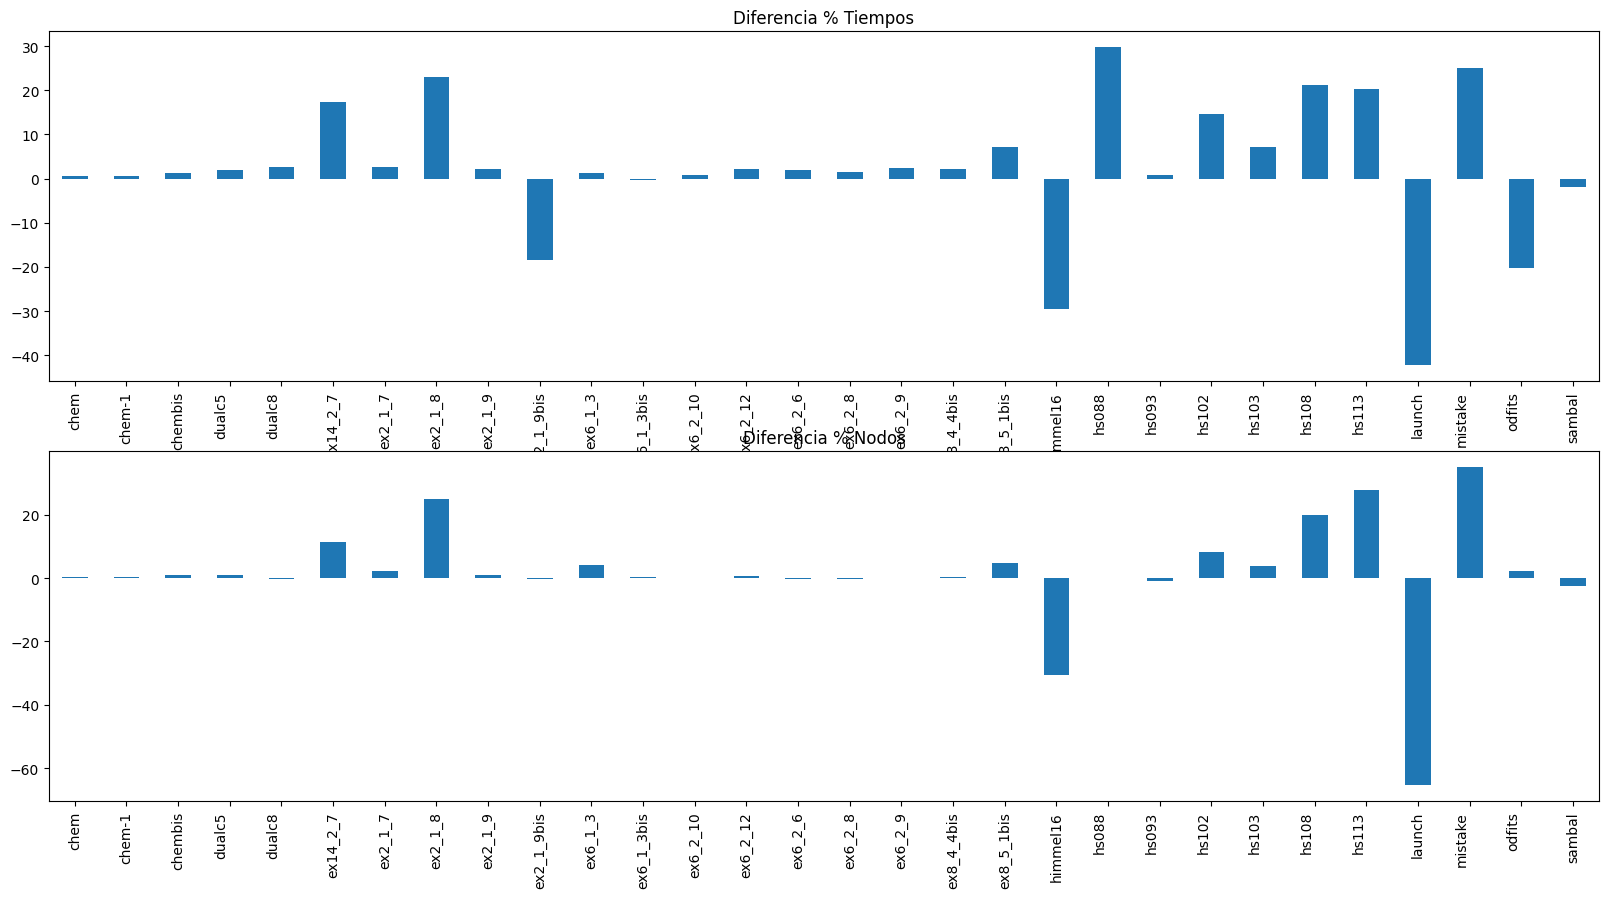

In [68]:
# graficar diferencias
fig, axs = plt.subplots(2, 1, figsize=(20, 10))
data['Tiempos']['Diferencia'].plot(kind='bar', ax=axs[0])
data['Nodos']['Diferencia'].plot(kind='bar', ax=axs[1])
axs[0].set_title('Diferencia % Tiempos')
axs[1].set_title('Diferencia % Nodos')

# Set the x-tick labels to be the problem names
axs[0].set_xticklabels(problemas)
axs[1].set_xticklabels(problemas)

plt.show()

In [69]:
# sacar promedio de diferencias
promedio_diferencias = {sheet: data[sheet]['Diferencia'].mean() for sheet in sheet_names}
promedio_diferencias

{'Tiempos': 2.6137424915551657, 'Nodos': 1.6427563566108458}

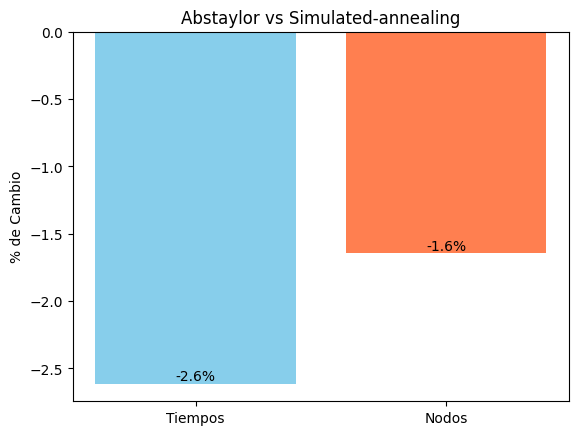

In [70]:
# Crear la figura y los ejes
fig, ax = plt.subplots()

# Multiplicar los promedios por -1
promedio_diferencias_negativos = {k: -v for k, v in promedio_diferencias.items()}

# Definir una lista de colores agradables
colores = ['skyblue', 'coral']

# Graficar los promedios con colores
bars = ax.bar(promedio_diferencias_negativos.keys(), promedio_diferencias_negativos.values(), color=colores)

# Establecer el título del gráfico con los nombres de las columnas
ax.set_title(f'{columnas[0]} vs {columnas[1]}')

# Establecer el nombre del eje y
ax.set_ylabel('% de Cambio')

# Agregar los valores de las barras en el gráfico como porcentajes
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{round(yval , 1)}%', ha='center', va='bottom')

# Agregar una nota al gráfico
# ax.text(0.02, 0.1, 'Nota: Los valores positivos están a favor de ' + columnas[1], transform=ax.transAxes)

plt.show()

In [71]:
# Calculo de Speed Up
for sheet in sheet_names:
    data[sheet]['Speed Up'] = data[sheet][columnas[0]] / data[sheet][columnas[1]]

# Mostrar head de cada hoja
data_preview = {sheet: data[sheet] for sheet in sheet_names}
data_preview

{'Tiempos':     Abstaylor  Simulated-annealing  Diferencia  Speed Up
 0    0.496823             0.503177    0.635440  0.987371
 1    0.497192             0.502808    0.561548  0.988832
 2    0.493387             0.506613    1.322565  0.973894
 3    0.490426             0.509574    1.914864  0.962422
 4    0.487383             0.512617    2.523316  0.950776
 5    0.413003             0.586997   17.399449  0.703586
 6    0.486642             0.513358    2.671599  0.947958
 7    0.385114             0.614886   22.977125  0.626319
 8    0.488736             0.511264    2.252816  0.955936
 9    0.592571             0.407429  -18.514166  1.454414
 10   0.493107             0.506893    1.378683  0.972801
 11   0.501086             0.498914   -0.217108  1.004352
 12   0.495491             0.504509    0.901708  0.982127
 13   0.488691             0.511309    2.261712  0.955766
 14   0.490683             0.509317    1.863480  0.963412
 15   0.492841             0.507159    1.431832  0.971768
 16

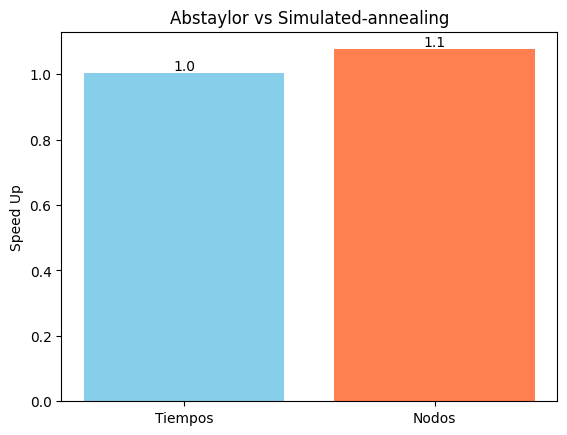

In [72]:
# Promedio de Speed Up
promedio_speed_up = {sheet: data[sheet]['Speed Up'].mean() for sheet in sheet_names}
promedio_speed_up

# Crear la figura y los ejes
fig, ax = plt.subplots()

# Definir una lista de colores agradables
colores = ['skyblue', 'coral']

# Graficar los promedios con colores
bars = ax.bar(promedio_speed_up.keys(), promedio_speed_up.values(), color=colores)

# Establecer el título del gráfico con los nombres de las columnas
ax.set_title(f'{columnas[0]} vs {columnas[1]}')

# Establecer el nombre del eje y
ax.set_ylabel('Speed Up')

# Agregar los valores de las barras en el gráfico como porcentajes
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{round(yval , 1)}', ha='center', va='bottom')

# Agregar una nota al gráfico
# ax.text(0.02, 0.1, 'Nota: Los valores positivos están a favor de ' + columnas[1], transform=ax.transAxes)

plt.show()